# Polycystic ovary syndrome (PCOS) Diagnosis

Polycystic ovary syndrome is characterized by infrequent, irregular, or prolonged menstrual periods, as well as elevated levels of male hormone (androgen). The ovaries form numerous small collections of fluid called follicles and may fail to release eggs on a regular basis.
The dataset includes all physical and clinical parameters used to diagnose PCOS and infertility issues.
The data used in this project is gathered from ten different hospitals across Kerala, India.

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Pre-Modeling Tasks
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Evaluation and comparision of all the models
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

#### About the Dataset

This dataset contains all physical and clinical parameters to determine PCOS and infertility related issues. There are a total of 44 parameters.

This data is collected from 10 different hospitals across Kerala, India.

The unit used is feet to cm

Blood pressure entered as systolic and diastolic separately

RBS means Random glucose test

Beta-HCG cases are mentioned as Case I and II

Blood Group indications: A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18

In [2]:
#import Dataset
data= pd.read_csv('PCOS_dataset.csv')
data.head()

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 40
0,1,0,28,44.6,152.0,19.300000,15,78,22,10.48,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,0,36,65.0,161.5,24.921163,15,74,20,11.70,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,1,33,68.8,165.0,25.270891,11,72,18,11.80,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,0,37,65.0,148.0,29.674945,13,72,20,12.00,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,0,25,52.0,161.0,20.060954,11,72,18,10.00,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


### Data Preprocessing 

If you notice the last column in the datatset, it consists of a unnamed column there by it can be eliminated from the dataset

In [3]:
data.columns

Index(['Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist(inch).1', 'TSH (mIU/L)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 40'],
      dtype='object')

In [4]:
#eliminating the unnamed column
data=data.drop(['Unnamed: 40'],axis=1)
data.head(10)

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,0,28,44.6,152.0,19.300000,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,0,36,65.0,161.5,24.921163,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,1,33,68.8,165.0,25.270891,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,0,37,65.0,148.0,29.674945,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,0,25,52.0,161.0,20.060954,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
5,6,0,36,74.1,165.0,27.217631,15,78,28,11.20,...,0,0.0,0,110,70,9,6,16.0,20.0,8.0
6,7,0,34,64.0,156.0,26.298488,11,72,18,10.90,...,0,0.0,0,120,80,6,6,15.0,16.0,6.8
7,8,0,33,58.5,159.0,23.139907,13,72,20,11.00,...,0,0.0,0,120,80,7,6,15.0,18.0,7.1
8,9,0,32,40.0,158.0,16.023073,11,72,18,11.80,...,0,0.0,0,120,80,5,7,17.0,17.0,4.2
9,10,0,36,52.0,150.0,23.111111,15,80,20,10.00,...,0,0.0,0,110,80,1,1,14.0,17.0,2.5


It is a good practice to check if all the cells have distinct values and perform preprocessing. If found any null vales perform the necessary tasks and assign vales.  

In [5]:
#checking for null values
data.isnull().sum()

Patient File No.         0
PCOS (Y/N)               0
 Age (yrs)               0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    1
Pregnant(Y/N)            0
No. of aborptions        0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist(inch).1            0
TSH (mIU/L)              0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          1
Reg.Exercise(Y/N)        0
BP _Systolic (mmHg)      0
BP _Diastolic (mmHg)     0
Follicle No. (L)         0
Follicle No. (R)         0
A

In [6]:
#checking and fixing the null values
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)
data.isnull().sum()

Patient File No.         0
PCOS (Y/N)               0
 Age (yrs)               0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    0
Pregnant(Y/N)            0
No. of aborptions        0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist(inch).1            0
TSH (mIU/L)              0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          0
Reg.Exercise(Y/N)        0
BP _Systolic (mmHg)      0
BP _Diastolic (mmHg)     0
Follicle No. (L)         0
Follicle No. (R)         0
A

##### Data Analysis

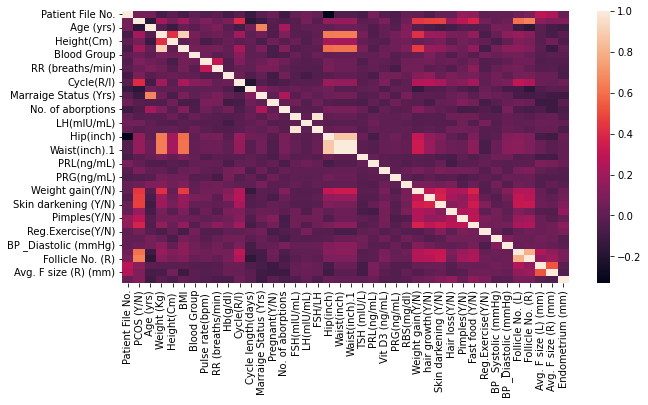

In [12]:
#correlation matrix of all features
corrmat = data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmat);

In [8]:
#How all the features correlate with the PCOS 
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)               1.000000
Follicle No. (R)         0.648327
Follicle No. (L)         0.603346
Skin darkening (Y/N)     0.475733
hair growth(Y/N)         0.464667
Weight gain(Y/N)         0.441047
Cycle(R/I)               0.401644
Fast food (Y/N)          0.376183
Pimples(Y/N)             0.286077
Weight (Kg)              0.211938
BMI                      0.199534
Hair loss(Y/N)           0.172879
Waist(inch).1            0.164598
Waist(inch)              0.164598
Hip(inch)                0.162297
Avg. F size (L) (mm)     0.132992
Endometrium (mm)         0.106648
Avg. F size (R) (mm)     0.097690
Pulse rate(bpm)          0.091821
Hb(g/dl)                 0.087170
Vit D3 (ng/mL)           0.085494
Height(Cm)               0.068254
Reg.Exercise(Y/N)        0.065337
LH(mIU/mL)               0.063879
Patient File No.         0.060998
RBS(mg/dl)               0.048922
BP _Diastolic (mmHg)     0.038032
RR (breaths/min)         0.036928
Blood Group              0.036433
BP _Systolic (

##### Patterns of Length of The Menstrual Cycle

In normal cases, the length of the menstrual phase remains consistent across ages. In the case of PCOD, however, the length increased with age.

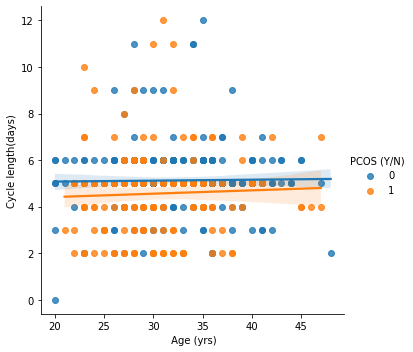

In [13]:
# Length of menstrual phase in PCOS vs normal 
color = ["teal", "plum"]
fig=sns.lmplot(data=data,x=' Age (yrs)',y="Cycle length(days)", hue="PCOS (Y/N)")
plt.show(fig)

##### Patterns Of BMI

Body mass index (BMI) is consistent in normal cases. In the case of PCOS, the BMI rises with age.

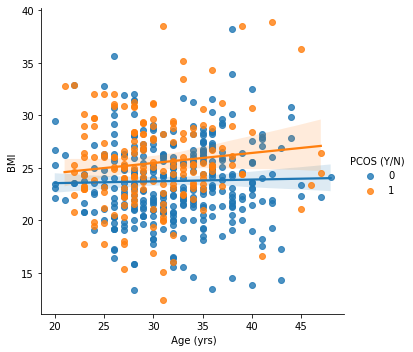

In [14]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =data,x=' Age (yrs)',y="BMI", hue="PCOS (Y/N)")
plt.show(fig)

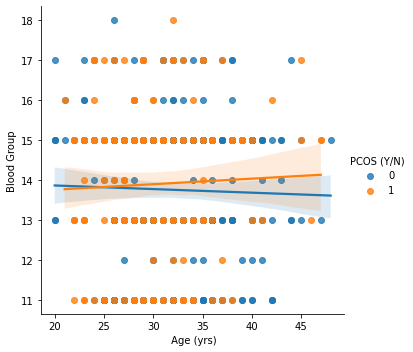

In [15]:
# Pattern of blood group over years in PCOS and Normal.
fig= sns.lmplot(data =data,x=' Age (yrs)',y="Blood Group", hue="PCOS (Y/N)")
plt.show(fig)

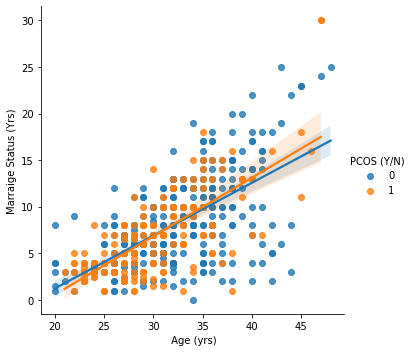

In [16]:
# Pattern of marriage status over years in PCOS and Normal.
fig= sns.lmplot(data =data,x=' Age (yrs)',y="Marraige Status (Yrs)", hue="PCOS (Y/N)")
plt.show(fig)

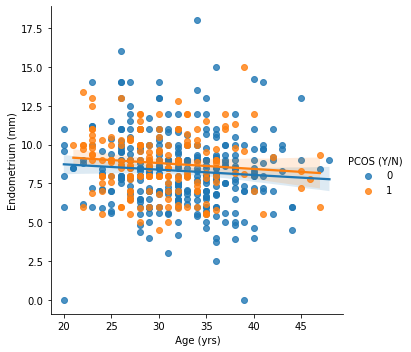

In [17]:
# Pattern of endometrium over years in PCOS and Normal.
fig= sns.lmplot(data =data,x=' Age (yrs)',y="Endometrium (mm)", hue="PCOS (Y/N)")
plt.show(fig)

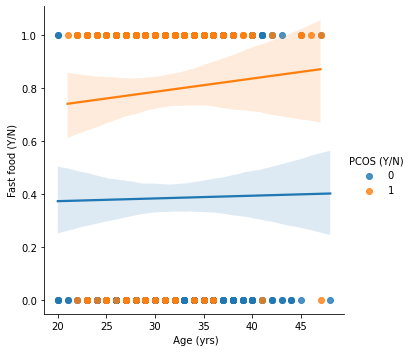

In [18]:
# Pattern of fast food over years in PCOS and Normal.
fig= sns.lmplot(data =data,x=' Age (yrs)',y="Fast food (Y/N)", hue="PCOS (Y/N)")
plt.show(fig)

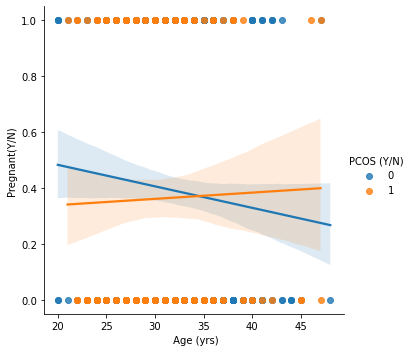

In [19]:
# pregnancy
fig= sns.lmplot(data =data,x=' Age (yrs)',y="Pregnant(Y/N)", hue="PCOS (Y/N)")
plt.show(fig)

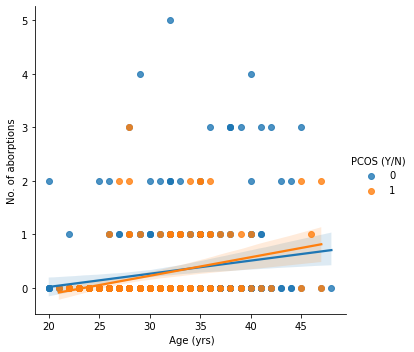

In [20]:
#no. of abortions
fig= sns.lmplot(data =data,x=' Age (yrs)',y="No. of aborptions", hue="PCOS (Y/N)")
plt.show(fig)

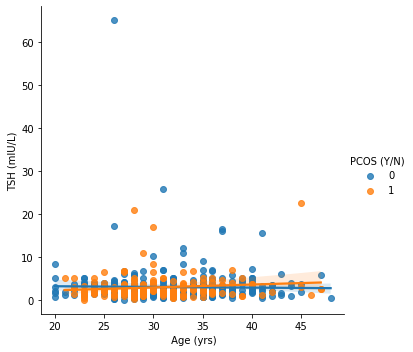

In [21]:
#TSH
fig= sns.lmplot(data =data,x=' Age (yrs)',y="TSH (mIU/L)", hue="PCOS (Y/N)")
plt.show(fig)

### Model Building 

In order to build the model for PCOS Prediction we have opted Support Vector machine. 
The SVM algorithm's goal is to find the best line or decision boundary for categorizing n-dimensional space so that we can easily place new data points in the correct category in the future. A hyperplane is the best decision boundary. 

There can be multiple lines/decision boundaries to segregate the classes in n-dimensional space, but we need to find out the best decision boundary that helps to classify the data points. This best boundary is known as the hyperplane of SVM.

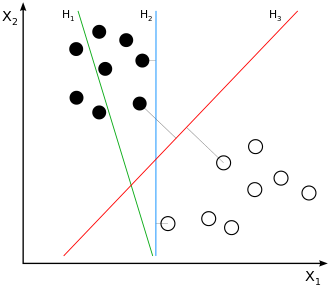

For more details on SVM refer: https://en.wikipedia.org/wiki/Support_vector_machine

In [22]:
#import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

In [23]:
#splitting the data into training and testing data
X=data.drop(["PCOS (Y/N)","Patient File No."],axis = 1)
y=data["PCOS (Y/N)"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=95)

In [24]:
#Support Vector Classification model
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        75
           1       1.00      0.03      0.06        34

    accuracy                           0.70       109
   macro avg       0.85      0.51      0.44       109
weighted avg       0.79      0.70      0.58       109



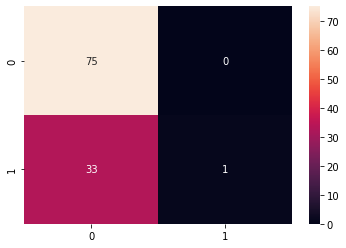

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

In [26]:
#normalized scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()
X_train_scaled = n_scaler.fit_transform(X_train.astype(np.float))
X_test_scaled = n_scaler.transform(X_test.astype(np.float))

C:\Users\Mohammed Usman F\AppData\Local\Temp\ipykernel_23204\1117003927.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_scaled = n_scaler.fit_transform(X_train.astype(np.float))
C:\Users\Mohammed Usman F\AppData\Local\Temp\ipykernel_23204\1117003927.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_scaled = n_scaler.t

In [27]:
#Support Vector Classification model -  apply on scaled data
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        75
           1       0.88      0.88      0.88        34

    accuracy                           0.93       109
   macro avg       0.91      0.91      0.91       109
weighted avg       0.93      0.93      0.93       109



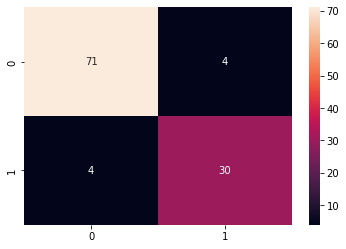

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.663 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.851 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.782 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.802 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.816 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.802 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.884 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.874 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.839 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.837 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.907 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.919 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.851 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.849 total time=   0.0s
[CV 4/5] END ...C=1000, gamm

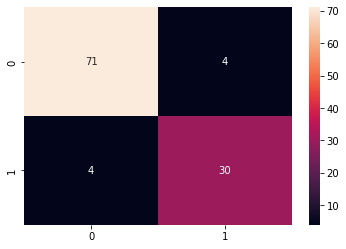

In [29]:
#find best hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose = 4)
grid.fit(X_train_scaled,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test_scaled)
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))

In [31]:
X=data.drop(["PCOS (Y/N)","Patient File No."],axis = 1)
y=data["PCOS (Y/N)"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=95)

In [32]:
# Logistic Regression


logreg= LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)


# Random Forest Classifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


# Decision Tree Classifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


# KNeighbors Classifier


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

# XGB Classifier

XGB = XGBClassifier() 

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)


# Gradient Boosting Classifier


GB = GradientBoostingClassifier()

GB.fit(X_train, y_train)

y_pred_GB = GB.predict(X_test)

#Ada Boost Classifier

AD=AdaBoostClassifier(random_state=96)
AD.fit(X_train,y_train)
y_pred_AD=AD.predict(X_test)



C:\Users\Mohammed Usman F\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
models = []

Z = [DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier(), RandomForestClassifier(),XGBClassifier(), GradientBoostingClassifier(),AdaBoostClassifier()] 


X = ["DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier", "RandomForestClassifier","XGBoostClassifier" ,"GradientBoostClassifier","AdaBoostClasssifier"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    models.append(accuracy_score(pred , y_test))

C:\Users\Mohammed Usman F\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
d = { "Accuracy" : models , "Algorithm" : X }
data_frame = pd.DataFrame(d)
data_frame

,Accuracy,Algorithm
0,0.834862,DecisionTreeClassifier
1,0.908257,LogisticRegression
2,0.761468,KNeighborsClassifier
3,0.944954,RandomForestClassifier
4,0.917431,XGBoostClassifier
5,0.917431,GradientBoostClassifier
6,0.908257,AdaBoostClasssifier


              precision    recall  f1-score   support

           0       0.95      0.92      0.93        75
           1       0.83      0.88      0.86        34

    accuracy                           0.91       109
   macro avg       0.89      0.90      0.89       109
weighted avg       0.91      0.91      0.91       109



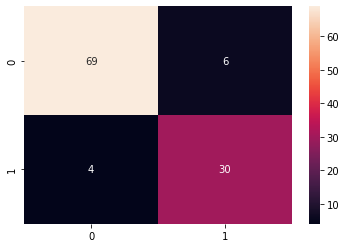

In [35]:
#logisticregression confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        75
           1       0.97      0.85      0.91        34

    accuracy                           0.94       109
   macro avg       0.95      0.92      0.93       109
weighted avg       0.95      0.94      0.94       109



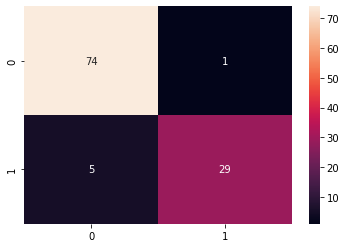

In [36]:
#randomforestclassifier confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = rf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        75
           1       0.68      0.74      0.70        34

    accuracy                           0.81       109
   macro avg       0.78      0.79      0.78       109
weighted avg       0.81      0.81      0.81       109



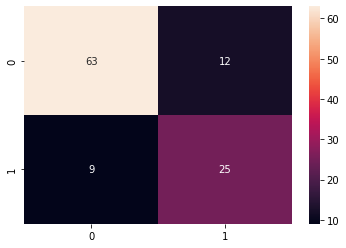

In [42]:
#decisiontreeclassifier confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        75
           1       0.70      0.41      0.52        34

    accuracy                           0.76       109
   macro avg       0.74      0.67      0.68       109
weighted avg       0.75      0.76      0.74       109



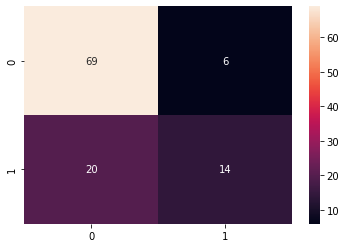

In [43]:
#kneighborsclassifier confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        75
           1       0.86      0.88      0.87        34

    accuracy                           0.92       109
   macro avg       0.90      0.91      0.90       109
weighted avg       0.92      0.92      0.92       109



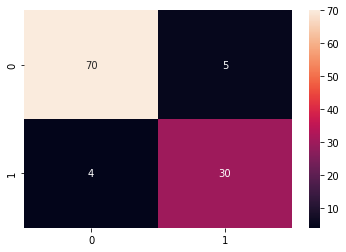

In [44]:
# XGB Classifier confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = XGB.predict(X_test)
cm = confusion_matrix(y_test, y_pred_XGB)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        75
           1       0.90      0.82      0.86        34

    accuracy                           0.92       109
   macro avg       0.91      0.89      0.90       109
weighted avg       0.92      0.92      0.92       109



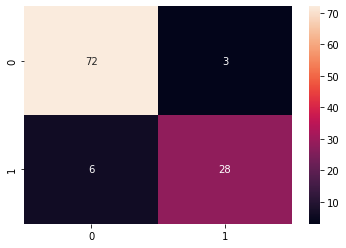

In [45]:
#gradient boosting classifier
from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = GB.predict(X_test)
cm = confusion_matrix(y_test, y_pred_GB)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        75
           1       0.85      0.85      0.85        34

    accuracy                           0.91       109
   macro avg       0.89      0.89      0.89       109
weighted avg       0.91      0.91      0.91       109



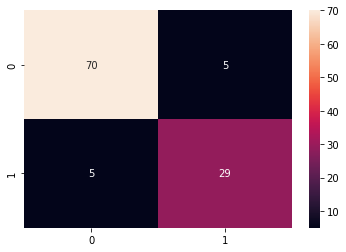

In [46]:
#ada boost classifier confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = AD.predict(X_test)
cm = confusion_matrix(y_test, y_pred_AD)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))